## 1st one Final

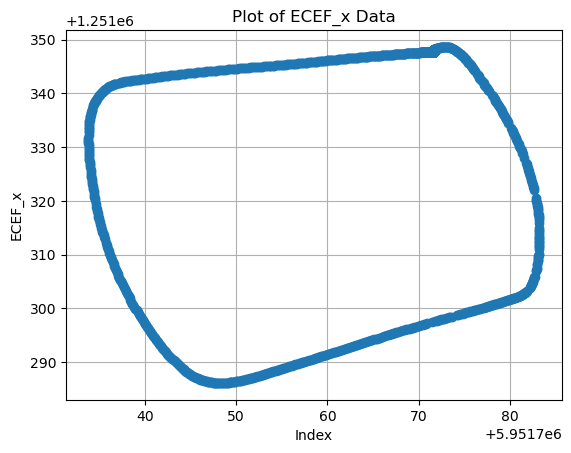

ecef 1490

rolling_mean             ecef_x        ecef_y        ecef_z
9     1.251348e+06  5.951772e+06  1.922993e+06
10    1.251348e+06  5.951772e+06  1.922993e+06
11    1.251348e+06  5.951772e+06  1.922993e+06
12    1.251348e+06  5.951772e+06  1.922993e+06
13    1.251348e+06  5.951772e+06  1.922993e+06
...            ...           ...           ...
1485  1.251348e+06  5.951772e+06  1.922992e+06
1486  1.251348e+06  5.951772e+06  1.922992e+06
1487  1.251348e+06  5.951772e+06  1.922992e+06
1488  1.251348e+06  5.951772e+06  1.922993e+06
1489  1.251348e+06  5.951772e+06  1.922993e+06

[1481 rows x 3 columns]
ref ecef_x    1.251348e+06
ecef_y    5.951772e+06
ecef_z    1.922993e+06
Name: 9, dtype: float64
df_enu 1490
       east     north       up
0  0.001844 -0.000479  0.00532
1  0.000889  0.000946  0.00032
2  0.000327  0.001077 -0.00128
3 -0.000495  0.000800 -0.00378
4 -0.000579  0.000067  0.00002


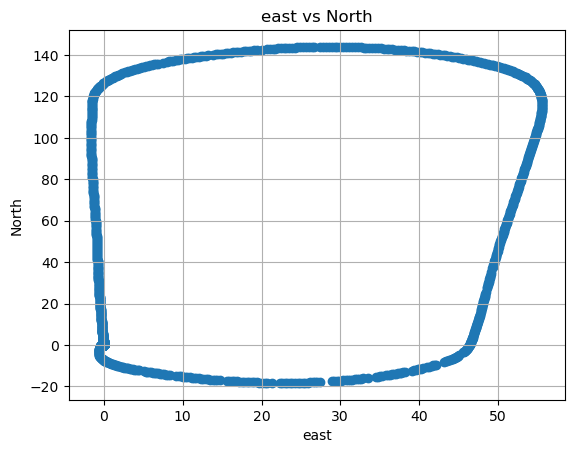

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Function to convert latitude, longitude, and height to ECEF coordinates
def convert_to_ecef(lat, lon, height):
    a = 6378137.0  # semi-major axis of the WGS84 ellipsoid in meters
    f = 1 / 298.257223563  # flattening of the WGS84 ellipsoid
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Compute auxiliary values
    sin_lat = math.sin(lat_rad)
    cos_lat = math.cos(lat_rad)
    sin_lon = math.sin(lon_rad)
    cos_lon = math.cos(lon_rad)
    
    # Compute prime vertical radius of curvature
    N = a / math.sqrt(1 - (f * (2 - f)) * sin_lat ** 2)
    
    # Compute ECEF coordinates
    x = (N + height) * cos_lat * cos_lon
    y = (N + height) * cos_lat * sin_lon
    z = ((1 - f) * N + height) * sin_lat
    
    return x, y, z

# Function to convert ECEF to ENU
def ecef_to_enu(x, y, z, ref_x, ref_y, ref_z):
    # Calculate displacement vector
    dx = x - ref_x
    dy = y - ref_y
    dz = z - ref_z
    
    # Convert reference point to ENU
    phi = np.arctan2(ref_z, np.sqrt(ref_x**2 + ref_y**2))
    lam = np.arctan2(ref_y, ref_x)
    ref_e = -np.sin(lam) * dx + np.cos(lam) * dy
    ref_n = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    ref_u = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    # Convert displacement vector to ENU
    east = -np.sin(lam) * dx + np.cos(lam) * dy
    north = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    up = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    return east, north, up

# Read the ASCII file and extract relevant fields
file_path = "/Users/ravitejakunchanapalli/Downloads/mod_BESTPOS.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
heights = []
ecef_data = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    hgt = float(fields[4])
    
    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    heights.append(hgt)
    
    # Convert latitude, longitude, and height to ECEF coordinates
    x, y, z = convert_to_ecef(lat, lon, hgt)
    ecef_data.append([x, y, z])

# Create DataFrame with relevant fields
df = pd.DataFrame({'lat': latitudes, 'lon': longitudes, 'hgt': heights})

# Define column names for ECEF DataFrame
ecef_columns = ['ecef_x', 'ecef_y', 'ecef_z']
df_ecef = pd.DataFrame(ecef_data, columns=ecef_columns)

plt.plot(df_ecef['ecef_y'], df_ecef['ecef_x'], marker='o', linestyle='-')
plt.xlabel('Index')
plt.ylabel('ECEF_x')
plt.title('Plot of ECEF_x Data')
plt.grid(True)
plt.show()

print("ecef",len(df_ecef))
print()
# Convert ECEF to ENU
window_size = 10  # Define window size for moving average
rolling_mean = df_ecef.rolling(window=window_size).mean().dropna()
print("rolling_mean",rolling_mean)
# Calculate reference point as the rolling mean
reference_point = rolling_mean.iloc[0]  
print("ref",reference_point)
# Apply ECEF to ENU conversion using the reference point
df_enu = df_ecef.apply(lambda row: ecef_to_enu(row['ecef_x'], row['ecef_y'], row['ecef_z'], reference_point['ecef_x'], reference_point['ecef_y'], reference_point['ecef_z']), axis=1)

# Create DataFrame for ENU coordinates
enu_columns = ['east', 'north', 'up']
df_enu = pd.DataFrame(df_enu.tolist(), columns=enu_columns)
print("df_enu",len(df_enu))
# Display DataFrame for ENU coordinates
print(df_enu.head())
# plt.plot(df_enu['east'],color='red')


plt.scatter(df_enu['east'], df_enu['north'])
plt.xlabel('east')
plt.ylabel('North')
plt.title('east vs North')
plt.grid(True)
plt.show()



ecef 2882
         ecef_x        ecef_y        ecef_z
0  1.251348e+06  5.951772e+06  1.922991e+06
1  1.251348e+06  5.951772e+06  1.922991e+06
2  1.251348e+06  5.951772e+06  1.922991e+06
3  1.251348e+06  5.951772e+06  1.922991e+06
4  1.251348e+06  5.951772e+06  1.922991e+06
df_enu 2882
       east      north        up
0 -9.662920 -24.020531 -0.120053
1 -9.663080 -24.020316 -0.120353
2 -9.663241 -24.020513 -0.121153
3 -9.663121 -24.020630 -0.119453
4 -9.662850 -24.020823 -0.119553


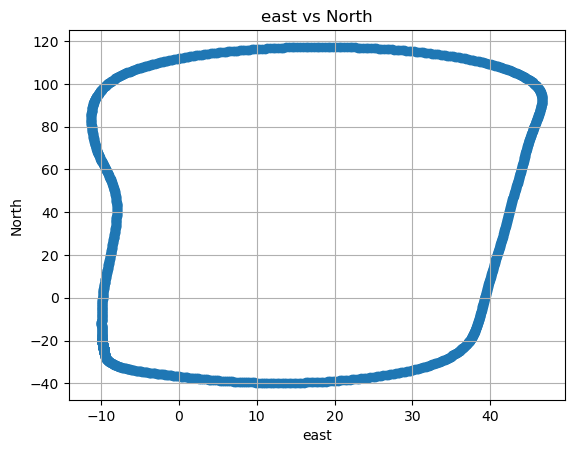

In [4]:
## passing seperately

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Function to convert latitude, longitude, and height to ECEF coordinates
def convert_to_ecef(lat, lon, height):
    a = 6378137.0  # semi-major axis of the WGS84 ellipsoid in meters
    f = 1 / 298.257223563  # flattening of the WGS84 ellipsoid
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Compute auxiliary values
    sin_lat = math.sin(lat_rad)
    cos_lat = math.cos(lat_rad)
    sin_lon = math.sin(lon_rad)
    cos_lon = math.cos(lon_rad)
    
    # Compute prime vertical radius of curvature
    N = a / math.sqrt(1 - (f * (2 - f)) * sin_lat ** 2)
    
    # Compute ECEF coordinates
    x = (N + height) * cos_lat * cos_lon
    y = (N + height) * cos_lat * sin_lon
    z = ((1 - f) * N + height) * sin_lat
    
    return x, y, z

# Function to convert ECEF to ENU
def ecef_to_enu(x, y, z, ref_x, ref_y, ref_z):
    # Calculate displacement vector
    dx = x - ref_x
    dy = y - ref_y
    dz = z - ref_z
    
    # Convert reference point to ENU
    phi = np.arctan2(ref_z, np.sqrt(ref_x**2 + ref_y**2))
    lam = np.arctan2(ref_y, ref_x)
    ref_e = -np.sin(lam) * dx + np.cos(lam) * dy
    ref_n = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    ref_u = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    # Convert displacement vector to ENU
    east = -np.sin(lam) * dx + np.cos(lam) * dy
    north = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    up = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    return east, north, up

# Read the ASCII file and extract relevant fields
file_path = "/Users/ravitejakunchanapalli/Downloads/RTKdemo_file.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
heights = []
ecef_data = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    hgt = float(fields[4])
    
    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    heights.append(hgt)
    
    # Convert latitude, longitude, and height to ECEF coordinates
    x, y, z = convert_to_ecef(lat, lon, hgt)
    ecef_data.append([x, y, z])

# Create DataFrame with relevant fields
df = pd.DataFrame({'lat': latitudes, 'lon': longitudes, 'hgt': heights})

# Define column names for ECEF DataFrame
ecef_columns = ['ecef_x', 'ecef_y', 'ecef_z']
df_ecef = pd.DataFrame(ecef_data, columns=ecef_columns)
print("ecef",len(df_ecef))
print(df_ecef.head())
# Convert ECEF to ENU
# Convert ECEF to ENU
window_size = 10  # Define window size for moving average

# Calculate moving average for each coordinate separately
rolling_mean_x = df_ecef['ecef_x'].rolling(window=window_size).mean().dropna()
rolling_mean_y = df_ecef['ecef_y'].rolling(window=window_size).mean().dropna()
rolling_mean_z = df_ecef['ecef_z'].rolling(window=window_size).mean().dropna()

# Take the first value of each rolling mean as the reference point
ref_x = rolling_mean_x.mean()
ref_y = rolling_mean_y.mean()
ref_z = rolling_mean_z.mean()

# Apply ECEF to ENU conversion using the reference point
df_enu = df_ecef.apply(lambda row: ecef_to_enu(row['ecef_x'], row['ecef_y'], row['ecef_z'], ref_x, ref_y, ref_z), axis=1)

# Create DataFrame for ENU coordinates
enu_columns = ['east', 'north', 'up']
df_enu = pd.DataFrame(df_enu.tolist(), columns=enu_columns)
print("df_enu",len(df_enu))
# Display DataFrame for ENU coordinates
print(df_enu.head())
# plt.plot(df_enu['east'],color='red')
plt.scatter(df_enu['east'], df_enu['north'])
plt.xlabel('east')
plt.ylabel('North')
plt.title('east vs North')
plt.grid(True)
plt.show()

0.16655773397517415
0.2146252205630316
0.4292504411260632


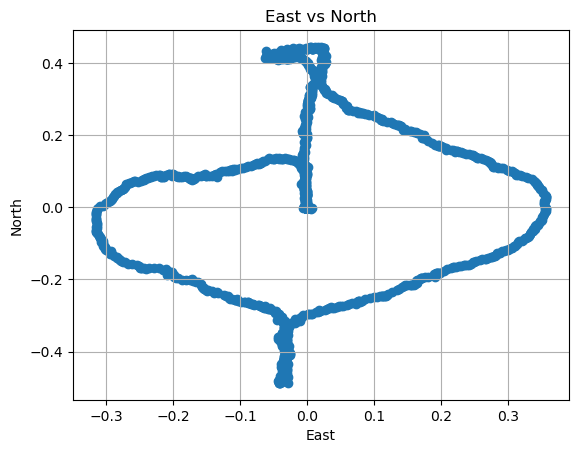

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

# Function to convert latitude, longitude, and height to ECEF coordinates
def convert_to_ecef(lat, lon, height):
    a = 6378137.0  # semi-major axis of the WGS84 ellipsoid in meters
    f = 1 / 298.257223563  # flattening of the WGS84 ellipsoid
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Compute auxiliary values
    sin_lat = math.sin(lat_rad)
    cos_lat = math.cos(lat_rad)
    sin_lon = math.sin(lon_rad)
    cos_lon = math.cos(lon_rad)
    
    # Compute prime vertical radius of curvature
    N = a / math.sqrt(1 - (f * (2 - f)) * sin_lat ** 2)
    
    # Compute ECEF coordinates
    x = (N + height) * cos_lat * cos_lon
    y = (N + height) * cos_lat * sin_lon
    z = ((1 - f) * N + height) * sin_lat
    
    return x, y, z

# Function to convert ECEF to ENU
def ecef_to_enu(x, y, z, ref_x, ref_y, ref_z):
    # Calculate displacement vector
    dx = x - ref_x
    dy = y - ref_y
    dz = z - ref_z
    
    # Convert reference point to ENU
    phi = np.arctan2(ref_z, np.sqrt(ref_x**2 + ref_y**2))
    lam = np.arctan2(ref_y, ref_x)
    ref_e = -np.sin(lam) * dx + np.cos(lam) * dy
    ref_n = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    ref_u = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    # Convert displacement vector to ENU
    east = -np.sin(lam) * dx + np.cos(lam) * dy
    north = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    up = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    return east, north, up

# Read the ASCII file and extract relevant fields
file_path = "/Users/ravitejakunchanapalli/Downloads/RTKdemo_file.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
heights = []
ecef_data = []

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    
    # Split the fields into individual data points
    fields = fields.split(',')
    
    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    hgt = float(fields[4])
    
    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    heights.append(hgt)
    
    # Convert latitude, longitude, and height to ECEF coordinates
    x, y, z = convert_to_ecef(lat, lon, hgt)
    ecef_data.append([x, y, z])

# Create DataFrame with relevant fields
df = pd.DataFrame({'lat': latitudes, 'lon': longitudes, 'hgt': heights})

# Define column names for ECEF DataFrame
ecef_columns = ['ecef_x', 'ecef_y', 'ecef_z']
df_ecef = pd.DataFrame(ecef_data, columns=ecef_columns)

# Append the provided code here
# Convert ECEF to ENU
# Initialize empty DataFrame to store ENU coordinates
df_enu = pd.DataFrame(columns=['east', 'north', 'up'])

# Iterate through each point in the dataset
for i in range(1, len(df_ecef)):
    # Use the preceding ECEF coordinates as the reference point
    ref_x = df_ecef['ecef_x'].iloc[i - 1]
    ref_y = df_ecef['ecef_y'].iloc[i - 1]
    ref_z = df_ecef['ecef_z'].iloc[i - 1]
    
    # Apply ECEF to ENU conversion using the reference point for the current point
    enu_point = ecef_to_enu(df_ecef['ecef_x'].iloc[i], df_ecef['ecef_y'].iloc[i], df_ecef['ecef_z'].iloc[i], ref_x, ref_y, ref_z)
    
    # Append ENU coordinates to DataFrame
    df_enu.loc[i] = enu_point

# Display DataFrame for ENU coordinates
eas_std=np.std(df_enu['east'])
nor_std=np.std(df_enu['north'])
rms=math.sqrt(eas_std**2+nor_std**2)
twodrms=2*rms
cep = 0.615 * eas_std + 0.562 * nor_std
print(cep)
print(rms)
print(twodrms)
# Plotting
plt.scatter(df_enu['east'], df_enu['north'])
plt.xlabel('East')
plt.ylabel('North')
plt.title('East vs North')
plt.grid(True)
plt.show()




## East vs utc plot

       east     north      up
1 -0.000159  0.000215 -0.0003
2 -0.000161 -0.000197 -0.0008
3  0.000120 -0.000117  0.0017
4  0.000271 -0.000193 -0.0001
5 -0.000192  0.000096 -0.0001
['36', '36', '36', '36', '36']
Length of utc_times: 2881
Length of df_enu['east']: 2881
0.16655773397517415
0.2146252205630316
0.4292504411260632


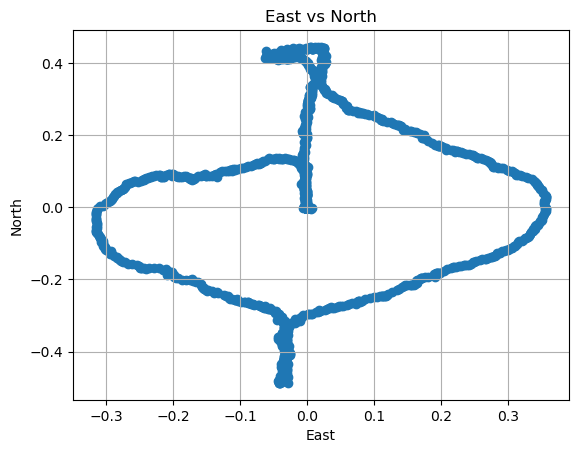

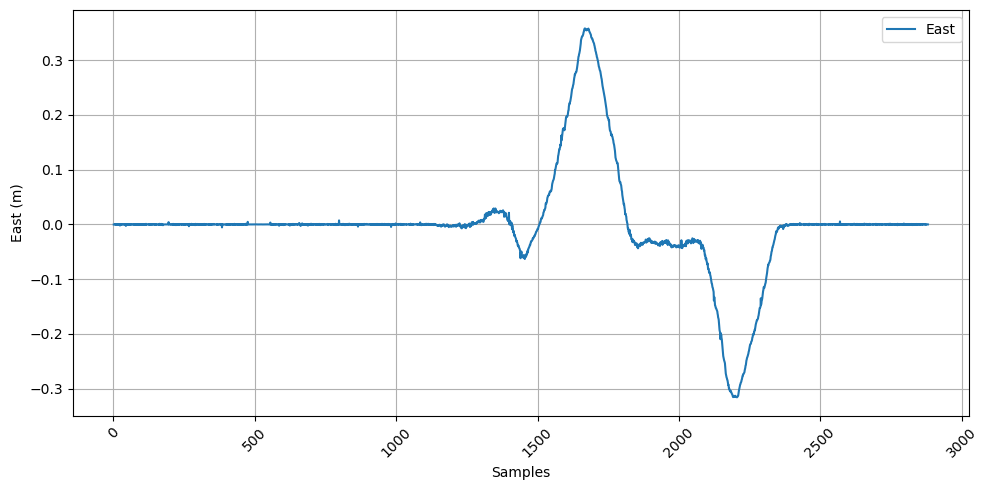

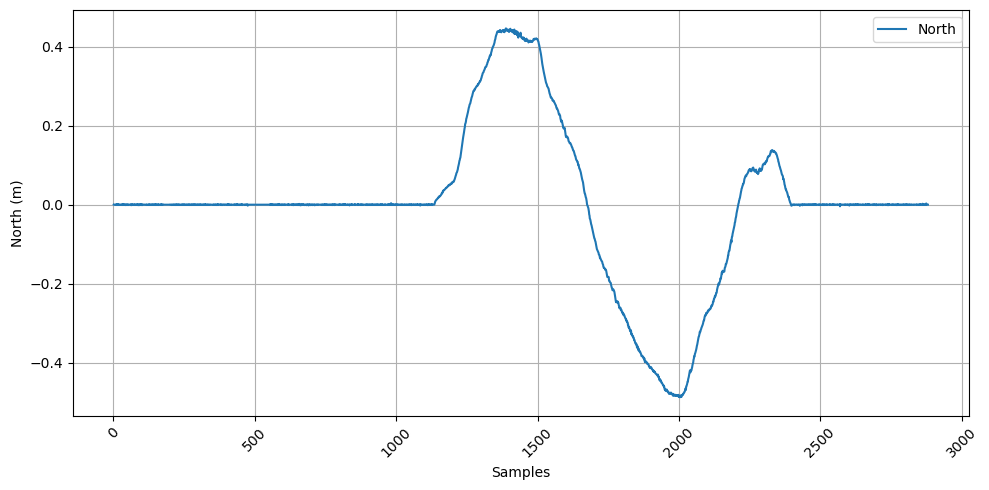

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from datetime import datetime, timedelta
import pytz

# Function to convert latitude, longitude, and height to ECEF coordinates
def convert_to_ecef(lat, lon, height):
    a = 6378137.0  # semi-major axis of the WGS84 ellipsoid in meters
    f = 1 / 298.257223563  # flattening of the WGS84 ellipsoid
    
    # Convert latitude and longitude from degrees to radians
    lat_rad = math.radians(lat)
    lon_rad = math.radians(lon)
    
    # Compute auxiliary values
    sin_lat = math.sin(lat_rad)
    cos_lat = math.cos(lat_rad)
    sin_lon = math.sin(lon_rad)
    cos_lon = math.cos(lon_rad)
    
    # Compute prime vertical radius of curvature
    N = a / math.sqrt(1 - (f * (2 - f)) * sin_lat ** 2)
    
    # Compute ECEF coordinates
    x = (N + height) * cos_lat * cos_lon
    y = (N + height) * cos_lat * sin_lon
    z = ((1 - f) * N + height) * sin_lat
    
    return x, y, z

# Function to convert ECEF to ENU
def ecef_to_enu(x, y, z, ref_x, ref_y, ref_z):
    # Calculate displacement vector
    dx = x - ref_x
    dy = y - ref_y
    dz = z - ref_z
    
    # Convert reference point to ENU
    phi = np.arctan2(ref_z, np.sqrt(ref_x**2 + ref_y**2))
    lam = np.arctan2(ref_y, ref_x)
    ref_e = -np.sin(lam) * dx + np.cos(lam) * dy
    ref_n = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    ref_u = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    # Convert displacement vector to ENU
    east = -np.sin(lam) * dx + np.cos(lam) * dy
    north = -np.sin(phi) * np.cos(lam) * dx - np.sin(phi) * np.sin(lam) * dy + np.cos(phi) * dz
    up = np.cos(phi) * np.cos(lam) * dx + np.cos(phi) * np.sin(lam) * dy + np.sin(phi) * dz
    
    return east, north, up

def gps_to_utc(week, towc):
    gps_epoch = datetime(1980, 1, 6, tzinfo=pytz.utc)  # start of GPS time
    leap_seconds = 18  # replace with the current number of leap seconds
    elapsed = timedelta(weeks=week, seconds=towc - leap_seconds)
    utc_time = gps_epoch + elapsed
    return utc_time.strftime('%S')

def gps_to_utc_foryear(week, towc):
    gps_epoch = datetime(1980, 1, 6, tzinfo=pytz.utc)  # start of GPS time
    leap_seconds = 18  # replace with the current number of leap seconds
    elapsed = timedelta(weeks=week, seconds=towc - leap_seconds)
    utc_time = gps_epoch + elapsed
    return utc_time.strftime('%Y-%m-%d')  # Return only year-month-date

# Read the ASCII file and extract relevant fields
file_path = "/Users/ravitejakunchanapalli/Downloads/RTKdemo_file.ASCII"
with open(file_path, 'r') as file:
    data = file.readlines()

# Initialize lists to store parsed data
latitudes = []
longitudes = []
heights = []
ecef_data = []
utc_times = [] 

# Iterate through each line in the file
for line in data:
    # Split the line into log header and fields
    log_header, fields = line.split(';')
    log_header=log_header.split(',')
    week = int(log_header[5])# Assuming GPS week is at index 5
    towc = float(log_header[6])  # Assuming time of ephemeris is at index 6
    # Split the fields into individual data points
    fields = fields.split(',')

    # Extracting relevant data (latitude, longitude, and height)
    lat = float(fields[2])
    lon = float(fields[3])
    hgt = float(fields[4])
    
    # Convert GPS week and time of ephemeris to UTC time
    utc_time = gps_to_utc(week, towc)

    # Store the parsed data in lists
    latitudes.append(lat)
    longitudes.append(lon)
    heights.append(hgt)
    utc_times.append(utc_time)
    # Convert latitude, longitude, and height to ECEF coordinates
    x, y, z = convert_to_ecef(lat, lon, hgt)
    ecef_data.append([x, y, z])

## Reference date for identifying 
first_line=data[0]
log_header, fields = first_line.split(';')
log_header=log_header.split(',')
week1 = int(log_header[5])# Assuming GPS week is at index 5
towc1 = float(log_header[6])  # Assuming time of ephemeris is at index 6
ref_date=gps_to_utc_foryear(week1,towc1)



# Create DataFrame with relevant fields
df = pd.DataFrame({'lat': latitudes, 'lon': longitudes, 'hgt': heights})

# Define column names for ECEF DataFrame
ecef_columns = ['ecef_x', 'ecef_y', 'ecef_z']
df_ecef = pd.DataFrame(ecef_data, columns=ecef_columns)

# Append the provided code here
# Convert ECEF to ENU
# Initialize empty DataFrame to store ENU coordinates
df_enu = pd.DataFrame(columns=['east', 'north', 'up'])

# Iterate through each point in the dataset
for i in range(1, len(df_ecef)):
    # Use the preceding ECEF coordinates as the reference point
    ref_x = df_ecef['ecef_x'].iloc[i - 1]
    ref_y = df_ecef['ecef_y'].iloc[i - 1]
    ref_z = df_ecef['ecef_z'].iloc[i - 1]
    
    # Apply ECEF to ENU conversion using the reference point for the current point
    enu_point = ecef_to_enu(df_ecef['ecef_x'].iloc[i], df_ecef['ecef_y'].iloc[i], df_ecef['ecef_z'].iloc[i], ref_x, ref_y, ref_z)
    
    # Append ENU coordinates to DataFrame
    df_enu.loc[i] = enu_point
utc_times_trimmed = utc_times[:-1]
print(df_enu[:5])
print(utc_times_trimmed[:5])
print("Length of utc_times:", len(utc_times_trimmed))
print("Length of df_enu['east']:", len(df_enu['east']))
# Display DataFrame for ENU coordinates
eas_std=np.std(df_enu['east'])
nor_std=np.std(df_enu['north'])
rms=math.sqrt(eas_std**2+nor_std**2)
twodrms=2*rms
cep = 0.615 * eas_std + 0.562 * nor_std
print(cep)
print(rms)
print(twodrms)

# Plotting
plt.scatter(df_enu['east'], df_enu['north'])
plt.xlabel('East')
plt.ylabel('North')
plt.title('East vs North')
plt.grid(True)
plt.show()

# Plotting utc_times vs east
plt.figure(figsize=(10, 5))
plt.plot(df_enu['east'], label='East')
plt.xlabel('Samples')
plt.ylabel('East (m)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting utc_times vs north
plt.figure(figsize=(10, 5))
plt.plot(df_enu['north'], label='North')
plt.xlabel('Samples')
plt.ylabel('North (m)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()





